# Lab - Janelas

Esta mostra a visualização de janelas no domínio do tempo e da frequência, e o efeito do janelamento no sinal senoidal.

*Processamento Digital de Sinais - UFPR - Prof. Eduardo Parente Ribeiro*

In [1]:
from pylab import *
from scipy.signal import *

1) plote no mesmo eixo as janelas retangular, triangular, hann, hamming e blackman,com 65 valores. <br>
(dica: janelas = [boxcar, bartlett, hann, hamming, blackman] é uma lista das funções janelas, e função.\__nome é uma string como nome da função )

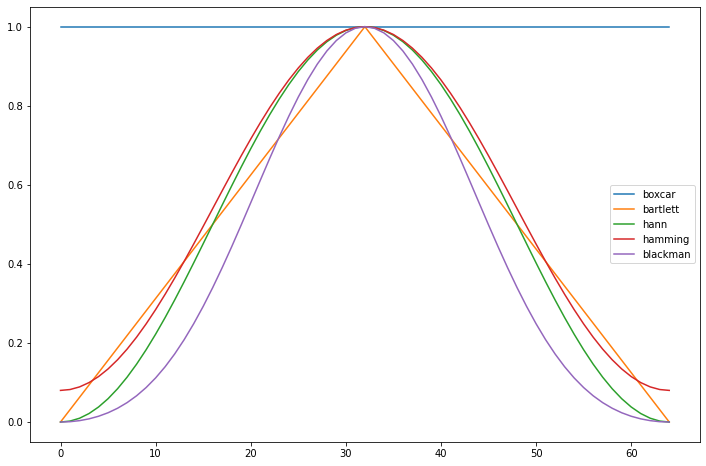

In [2]:
janelas = [boxcar, bartlett, hann, hamming, blackman]
figure(figsize=(12,8))

for i in range(5):
    plot(janelas[i](65), label = str(janelas[i].__name__))
legend()
show()

2) plote no mesmo eixo as transformadas de fourier das janelas retangular, triangular, hann, hamming e blackman. <br>
Considerar janelas de 16 valores, completando com zeros até 256. <br>
usar fftshift(), para ter a frequência zero no centro. <br>
Dividir os valores pelo máximo de cada janela, para possibilitar a comparação dos valores normalizados entre 0 e 1.


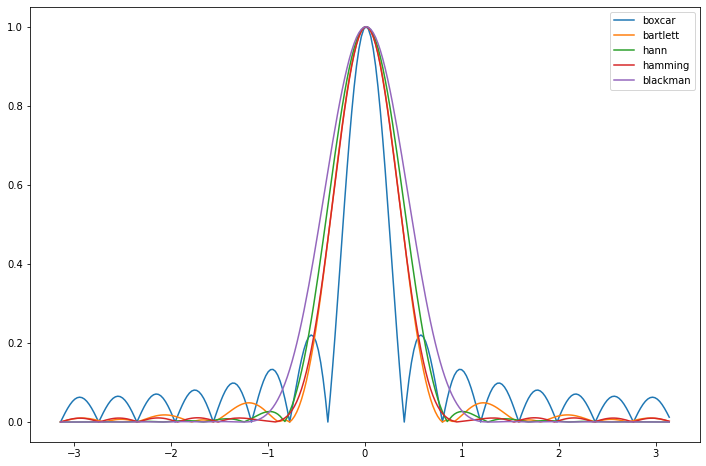

In [3]:
w = linspace(-pi, pi, 256)
figure(figsize=(12,8))

for i in range(5):
    jan = pad(janelas[i](16), 120, constant_values=0)
    JAN = fft(jan)
    plot(w, abs(fftshift(JAN/max(JAN))), label=str(janelas[i].__name__))
legend()
show()

3) Qual dessas janelas possui espectro com menor largura do lobulo principal ? E qual dessas janelas possui menor amplitude de lóbulo lateral?


A janela de Boxcar possui a menor largura do lóbulo principal e a janela de Blackman possui a menor amplitude de lóbulo lateral.

4) Plot janelas de kaiser com parametros beta=[0.1, 1, 6, 9, 12].<br>
Para comparação, plote janelas hann e blackman com simbolo 'o'.

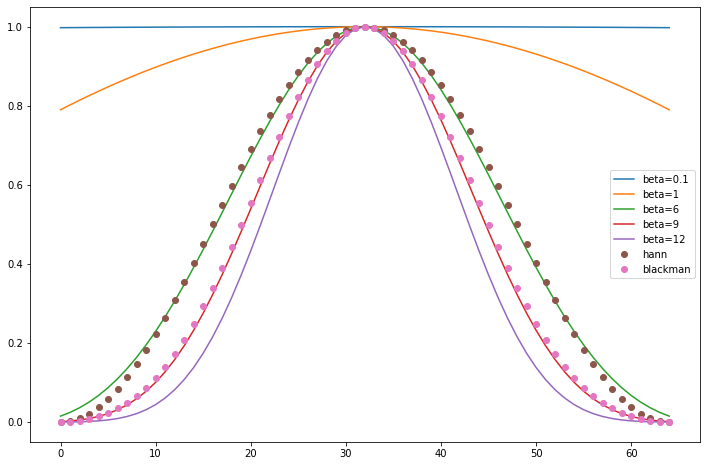

In [4]:
beta = [0.1, 1, 6, 9, 12]
figure(figsize=(12,8))

for i in range(len(beta)):
    plot(kaiser(65, beta[i]), label='beta='+str(beta[i]))
plot(hann(65), 'o', label='hann')
plot(blackman(65), 'o', label='blackman')
legend()
show()

5) crie vetor x com 16 elementos, uma senoide com 4 ciclos.<br>

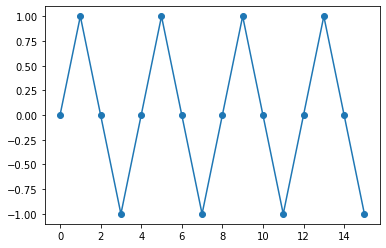

In [5]:
x = sin(arange(16)*2*pi/4)
plot(x, marker='o')

6) crie vetor y, acrescentando 240 zeros ao vetor x. 

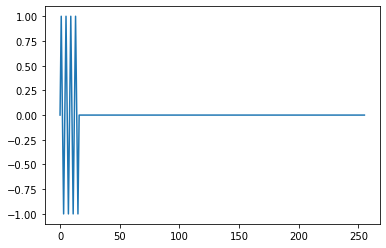

In [6]:
y = pad(x, (0,240))
plot(y)

7) crie vetor z com 256 elementos, uma senoide com a mesma frequência. <br>

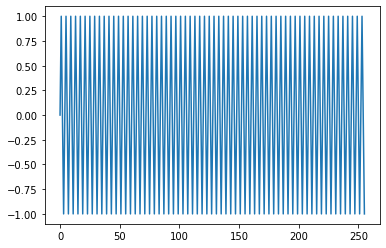

In [7]:
z = sin(arange(256)*2*pi/4)
plot(z)

8) plote no mesmo eixo os espectros dos tres sinais.<br>
Dividir os valores pelo máximo de cada janela, para possibilitar a comparação dos valores normalizados entre 0 e 1.

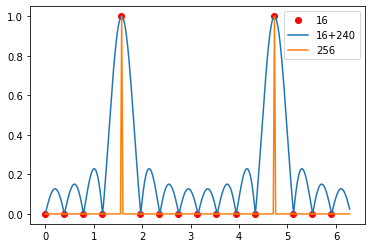

In [27]:
X = fft(x)
Y = fft(y)
Z = fft(z)
w1 = linspace(0, 2*pi, 16, endpoint=False)
w3 = w + pi

plot(w1, abs(X/max(abs(X))), 'ro', label='16')
plot(w3, abs(Y/max(abs(Y))), label='16+240')
plot(w3, abs(Z/max(abs(Z))), label='256')
legend()
show()

A partir da resposta em frequência obtida é possível notar a ocorrência do vazamento. Ao aplicar o método de janelamento a componente em uma frequência "vaza" nas componentes vizinhos devido ao espalhamento espectral causado pela janela.

9) Obter o sinal zz multiplicando o sinal z por uma janela de hann de tamanho 16.

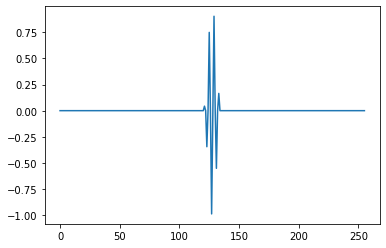

In [24]:
zz = z*pad(hann(16), 120)
plot(zz)

10) Plote no mesmo eixo os espectros dos tres sinais do item 8) e o espectro de zz.<br>
Dividir os valores pelo máximo de cada janela, para possibilitar a comparação dos valores normalizados entre 0 e 1.

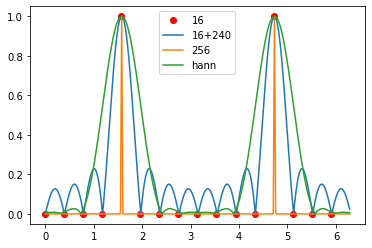

In [28]:
ZZ = fft(zz)


plot(w1, abs(X/max(abs(X))), 'ro', label='16')
plot(w3, abs(Y/max(abs(Y))), label='16+240')
plot(w3, abs(Z/max(abs(Z))), label='256')
plot(w3, abs(ZZ/max(abs(ZZ))), label='hann')
legend()
show()